In [1]:
!git clone https://github.com/prism-pro/DD2360HT22.git



Cloning into 'DD2360HT22'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 27 (delta 5), reused 22 (delta 3), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [2]:
!mkdir cufiles
!cp -f DD2360HT22/hw_3/*.cu ./cufiles


In [15]:
!nvcc -I/usr/local/cuda-11/samples/common/inc ./cufiles/lab3_ex1.cu -o ex1

In [14]:
!./ex1 131070

/bin/bash: ./ex1: No such file or directory


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex1 131070

The input length is 131070
==PROF== Connected to process 1489 (/content/ex1)
==PROF== Profiling "vecAdd" - 1: 0%....50%....100% - 8 passes
Time comsuption of copying memory to the GPU is 0.000612 the results are equal.==PROF== Disconnected from process 1489
[1489] ex1@127.0.0.1
  vecAdd(double*, double*, double*, int), 2022-Dec-15 15:25:45, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.03
    SM Frequency                                                             cycle/usecond                         587.82
    Elapsed Cycles                                                                   cycle                          6,645
    Memory [%]                                                                           %                          6

In [10]:
import subprocess 
import re
import numpy as np


collect output time comsuption 

In [70]:
sizes = np.linspace(131070, 13107000, 6)
mem_h2d=[]
kernel=[]
mem_d2h=[]

for i in sizes:
  p = subprocess.run(f'./ex1 {i}', shell=True, capture_output=True)
  txt = p.stdout.decode('utf-8')
  numbers=re.findall("\d+\.?\d*", txt) 
  mem_h2d.append(float(numbers[2])) 
  kernel.append(float(numbers[4]))
  mem_d2h.append(float(numbers[6]))
print(mem_h2d)
print(kernel)
print(mem_d2h)

[0.000539, 0.009088, 0.018052, 0.027223, 0.035484, 0.043668]
[9.9e-05, 0.000311, 0.00053, 0.000753, 0.001009, 0.001278]
[0.000831, 0.017426, 0.028227, 0.041048, 0.054869, 0.066689]


             mem_h2d    kernel   mem_d2h
131070.0    0.000539  0.000099  0.000831
2726256.0   0.009088  0.000311  0.017426
5321442.0   0.018052  0.000530  0.028227
7916628.0   0.027223  0.000753  0.041048
10511814.0  0.035484  0.001009  0.054869
13107000.0  0.043668  0.001278  0.066689


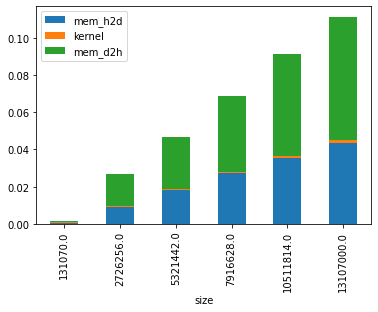

In [112]:
from tables import index
import matplotlib.pyplot as plt
import pandas as pd
# create data
df= pd.DataFrame([mem_h2d,kernel,mem_d2h],
                columns=sizes,
                index=['mem_h2d','kernel','mem_d2h'])
df=df.T
print(df)
df.plot(kind='bar',stacked=True,xlabel="size",)
plt.show()

**EX 2**

In [114]:
!nvcc -I/usr/local/cuda-11/samples/common/inc ./cufiles/lab3_ex2.cu -o ex2





In [84]:
!./ex2 128 128 128 128

Input matrix dim (128 x 128) (128 x 128) (128 x 128)
Time to copy memory from  Host to Device: 0.000110
Time of running kernel: 0.000146
Time to copy memory from  Device to Host: 0.000115
the results are equal.

In [83]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
==WARNING== No kernels were profiled.
==WARNING== Profiling kernels launched by child processes requires the --target-processes all option.


In [115]:
ARow=["512", "563", "614", "665", "716" ,"768"]
ACol=["1024", "1228", "1433", "1638", "1843" ,"2048"]
BCol=["4096", "4915", "5734", "6553" ,"7372", "8192"]
mem_h2d_2=[]
kernel_2=[]
mem_d2h_2=[]
for i in range(6):
  inst="./ex2 "+ ARow[i]+" "+ACol[i]+" " +ACol[i]+" " +BCol[i]
  print(inst)
  p = subprocess.run(inst, shell=True,stdout=subprocess.PIPE)
  txt = p.stdout.decode('utf-8')
  numbers=re.findall("\d+\.?\d*", txt) 
  print(numbers)
  mem_h2d_2.append(float(numbers[6])) 
  kernel_2.append(float(numbers[7]))
  mem_d2h_2.append(float(numbers[8]))
print(mem_h2d_2)
print(kernel_2)
print(mem_d2h_2)

./ex2 512 1024 1024 4096
['512', '1024', '1024', '4096', '512', '4096', '0.004281', '0.030722', '0.005875']
./ex2 563 1228 1228 4915
['563', '1228', '1228', '4915', '563', '4915', '0.005960', '0.063553', '0.007454']
./ex2 614 1433 1433 5734
['614', '1433', '1433', '5734', '614', '5734', '0.007855', '0.090647', '0.009694']
./ex2 665 1638 1638 6553
['665', '1638', '1638', '6553', '665', '6553', '0.010145', '0.127135', '0.011626']
./ex2 716 1843 1843 7372
['716', '1843', '1843', '7372', '716', '7372', '0.012665', '0.147113', '0.013764']
./ex2 768 2048 2048 8192
['768', '2048', '2048', '8192', '768', '8192', '0.015747', '0.172241', '0.016009']
[0.004281, 0.00596, 0.007855, 0.010145, 0.012665, 0.015747]
[0.030722, 0.063553, 0.090647, 0.127135, 0.147113, 0.172241]
[0.005875, 0.007454, 0.009694, 0.011626, 0.013764, 0.016009]


                         mem_h2d    kernel   mem_d2h
(512,1024)*(1024,4096)  0.004281  0.030722  0.005875
(563,1228)*(1228,4915)  0.005960  0.063553  0.007454
(614,1433)*(1433,5734)  0.007855  0.090647  0.009694
(665,1638)*(1638,6553)  0.010145  0.127135  0.011626
(716,1843)*(1843,7372)  0.012665  0.147113  0.013764
(768,2048)*(2048,8192)  0.015747  0.172241  0.016009


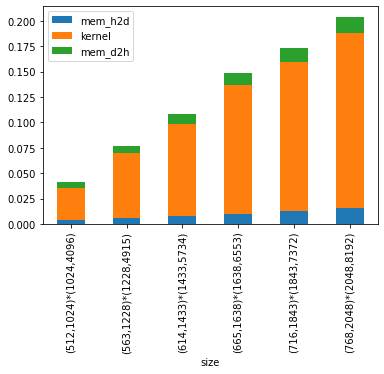

In [116]:
sizes_2=[]
for i in range(6):
  sizes_2.append("("+ ARow[i]+","+ACol[i]+")*(" +ACol[i]+"," +BCol[i]+")")
df= pd.DataFrame([mem_h2d_2,kernel_2,mem_d2h_2],
                columns=sizes_2,
                index=['mem_h2d','kernel','mem_d2h'])
df=df.T
print(df)
df.plot(kind='bar',stacked=True,xlabel="size")
plt.show()